# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$

In [2]:
def posicion_y(R,theta,v0,b,g):
  theta=np.deg2rad(theta)
  v0x=v0*np.cos(theta)
  v0y=v0*np.sen(theta)
  y1=R/v0x
  y2=v0y+g/b
  y3=g/b**2
  y4=np.log(1-R*b/v0x)
  y=y1*y2+y3*y4
  return y


2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


Calculemos primero las gráficas de x vs t, y vs t , x vs y para tener una intuición de donde está el cero de la función

\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}

In [23]:
def pos_x(t,theta,v0,b,g):
  theta=np.deg2rad(theta)
  v0x=v0*np.cos(theta)
  x=v0x*(1-np.exp(-b*t))/b
  return x

def pos_y(t,theta,v0,b,g):
  theta=np.deg2rad(theta)
  v0y=v0*np.sin(theta)
  y1=(v0y+g/b)/b
  y2=(1-np.exp(-b*t))
  y3=g*t/b
  y=y1*y2-y3
  return y

In [47]:
theta=45
v0=55
b=0.005
g=9.8
t = np.linspace(0,10,50)
x=pos_x(t,theta,v0,b,g)
y=pos_y(t,theta=45,v0=55,b=0.005,g=9.8)

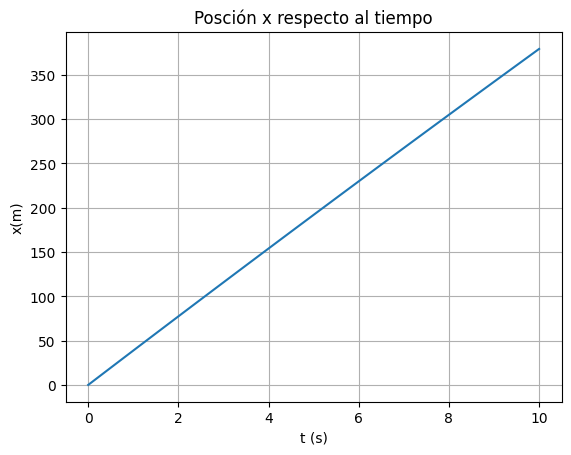

In [48]:
plt.plot(t,x)
plt.title("Posción x respecto al tiempo")
plt.xlabel("t (s)")
plt.ylabel("x(m)")
plt.grid()
plt.show()

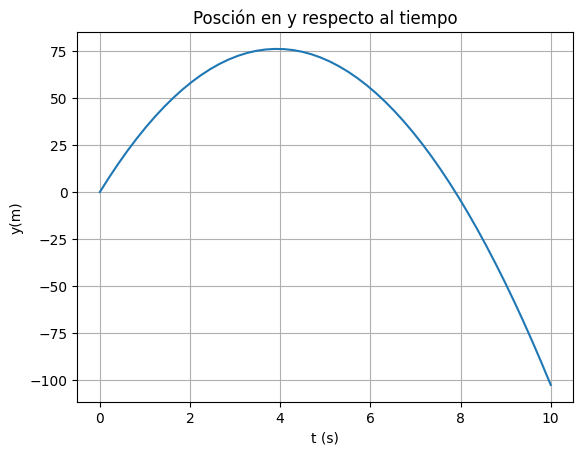

In [49]:
plt.plot(t,y)
plt.title("Posción en y respecto al tiempo")
plt.xlabel("t (s)")
plt.ylabel("y(m)")
plt.grid()
plt.show()

In [54]:
dataframe={'Tiempo de caída':t,'Funcion':pos_y(t,theta,v0,b,g)} #x,y
df=pd.DataFrame(dataframe)
df_filtro=df[df.Funcion.between(-8,8)] #vemos que hay un cambio de signo en la función, entonces entre esos dos puntos está la raíz de la función
df_filtro

,Tiempo de caída,Funcion
0,0.000000,0.000000
1,0.204082,7.728853
38,7.755102,4.908593
39,7.959184,-2.869854


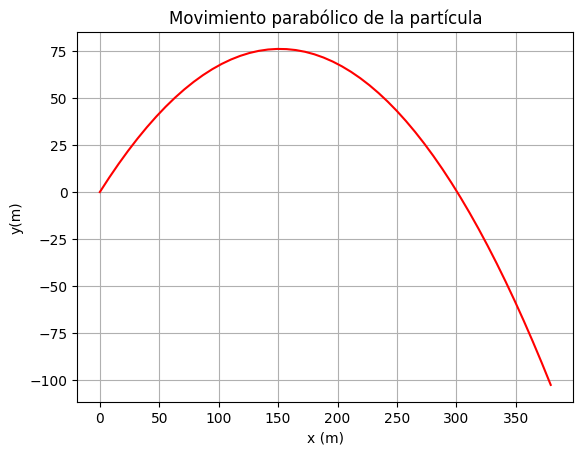

In [50]:
plt.plot(x,y,color='red')
plt.title("Movimiento parabólico de la partícula")
plt.xlabel("x (m)")
plt.ylabel("y(m)")
plt.grid()
plt.show()

In [61]:
dataframe={'Posicion_x':pos_x(t,theta,v0,b,g),'Posición en y':pos_y(t,theta,v0,b,g)} #x,y
df1=pd.DataFrame(dataframe)
df_filtro=df1[df1.Posicion_x.between(-10,10)] #vemos que hay un cambio de signo en la función, entonces entre esos dos puntos está la raíz de la función
df_filtro

,Posicion_x,Posición en y
0,0.000000,0.000000
1,7.932865,7.728853


Vemos que aproximadamente en un tiempo t=7.8 s, la pelotita llega al suelo y el alcance es máximo (aprox. 4.9 m)

In [ ]:
#raiz_bisect=optimize.bisect(pos_y(t,theta,v0,b,g),4.73,4.74)

#print(f'El tiempo de vuelo es de {raiz_bisect:.3} s')  #La raíz es el tiempo de vuelo, es decir cuando la función es cero es el tiempo que se demora hasta llegar al piso

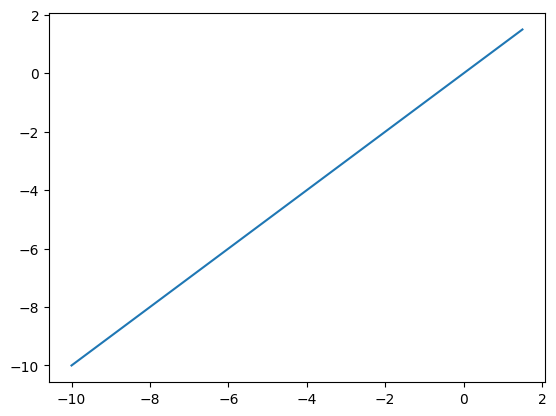

In [67]:
R=np.linspace(-10, 1.5, 100)
plt.plot(R,y)

In [71]:
neton=optimize.newton(posicion_y,5,args=(theta,v0,b,g))
neton

2.7590518371507047e-12

3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

In [72]:
def g(x0):
  g=x0-posicion_y(x0)

fp=optimize.fixed_point(g,5,args=(theta,v0,b,g))

TypeError: g() takes 1 positional argument but 5 were given